<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r2_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-1-r2.csv?token=AKVFSOFSLBI4J7JFHUBWGV263IB6I')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-normal-n-0-15-r2.csv?token=AKVFSOHGATDNW3YY2EEOYK263ICNO')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
1,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,6,1,6,6,8,4,3,27,1
2,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,11,2,12,22,8,4,3,30,0
3,224,1,4,1,1,4,3,9,1,1,22,6,8,2,1,0.500000,8,10,3,12,30,4,32,3,27,0
4,224,1,4,1,1,4,3,9,0,0,22,6,6,3,2,0.666667,12,5,2,6,10,4,24,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84645,3276535,4,0,6,4,2,3,10,18,2,20,4,30091,3,0,0.000000,25,5,11,15,55,0,1444368,18,180,0
84646,3276542,4,0,6,5,3,3,10,18,2,20,4,30091,3,0,0.000000,32,4,12,15,48,0,2708190,18,180,0
84647,3276543,4,0,2,1,4,3,11,18,2,20,4,30092,3,0,0.000000,32,3,13,15,39,0,240736,6,66,0
84648,3276544,2,0,7,1,4,3,12,18,2,15,15,30091,4,0,0.000000,6,2,14,15,28,0,842548,21,252,0


In [0]:
df.shape

(84650, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-11-r2.csv?token=AKVFSOFQUUBBYNVV7YQ5NPS63IB6M')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-12-r2.csv?token=AKVFSOHNXJCRW2Y5EHJ525263ICWK')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-7-r2.csv?token=AKVFSOFOWY6S2IPVTC5I3OK63ICWM')

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(39851, 26)
(39884, 26)
(39851, 26)


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.556773,0.317766,-0.000470,0.000694,NaN,0.354327,-0.046870,0.107398,-0.716880,-0.820848,-0.229440,-0.082119,0.104533,0.016738,0.025023,0.288066,0.052817,0.317766,0.393742,0.020440
inport,-0.556773,1.000000,-0.232339,0.064615,-0.095493,NaN,-0.464880,0.067463,0.143629,0.357496,0.406691,0.188302,-0.070591,-0.161264,-0.173140,-0.169549,0.512137,-0.006829,-0.232339,-0.349497,-0.070524
cache_coherence_type,0.317766,-0.232339,1.000000,0.369022,-0.545369,NaN,-0.149751,-0.005055,0.002032,-0.263699,-0.273697,-0.511131,0.029401,-0.008821,0.015368,0.020570,0.016295,0.297808,1.000000,0.965765,0.019814
flit_id,-0.000470,0.064615,0.369022,1.000000,-0.075722,NaN,-0.229135,0.018983,0.016569,0.004363,0.000505,0.525123,-0.009845,0.007458,-0.001782,0.000424,0.031609,0.667548,0.369022,0.311807,-0.007363
flit_type,0.000694,-0.095493,-0.545369,-0.075722,1.000000,NaN,0.338634,-0.028055,-0.024487,-0.006448,-0.000747,0.502223,-0.090583,0.094460,0.002895,0.006086,-0.046714,0.058544,-0.545369,-0.460813,0.010882
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.354327,-0.464880,-0.149751,-0.229135,0.338634,NaN,1.000000,0.002234,-0.184858,-0.416877,-0.370342,-0.018926,0.026073,0.133184,0.118927,0.105746,-0.303867,-0.090225,-0.149751,0.103857,-0.011458
traversal_id,-0.046870,0.067463,-0.005055,0.018983,-0.028055,NaN,0.002234,1.000000,0.005688,-0.021385,-0.018086,0.017318,0.064059,0.064846,0.096262,0.024045,0.015381,0.548647,-0.005055,-0.005477,-0.287148
hop_count,0.107398,0.143629,0.002032,0.016569,-0.024487,NaN,-0.184858,0.005688,1.000000,0.263960,-0.288101,0.106082,-0.176987,-0.099793,-0.206688,-0.172591,0.463038,0.007364,0.002032,-0.053182,0.141061
current_hop,-0.716880,0.357496,-0.263699,0.004363,-0.006448,NaN,-0.416877,-0.021385,0.263960,1.000000,0.801541,0.328638,0.015883,-0.105945,-0.067255,-0.060019,0.019069,-0.072855,-0.263699,-0.360112,0.149824


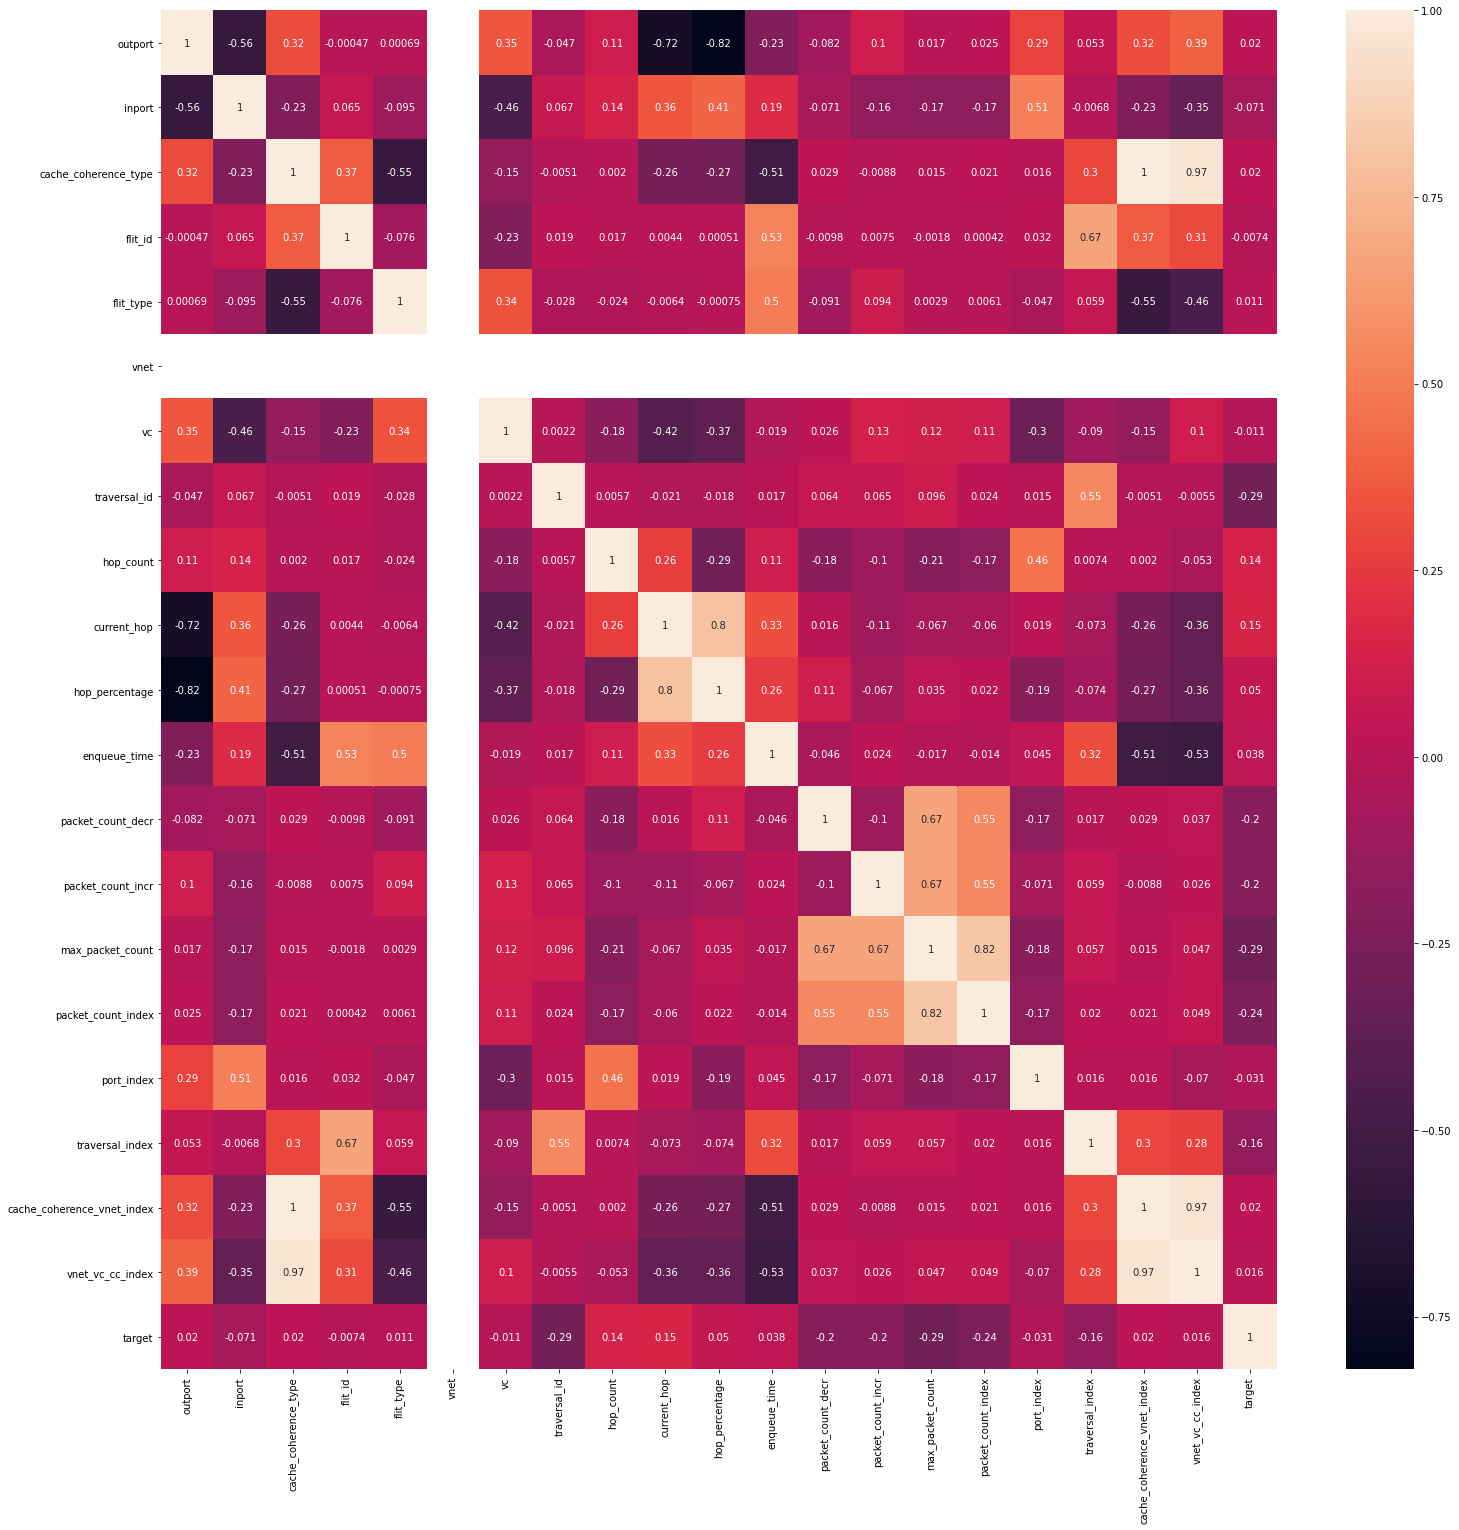

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

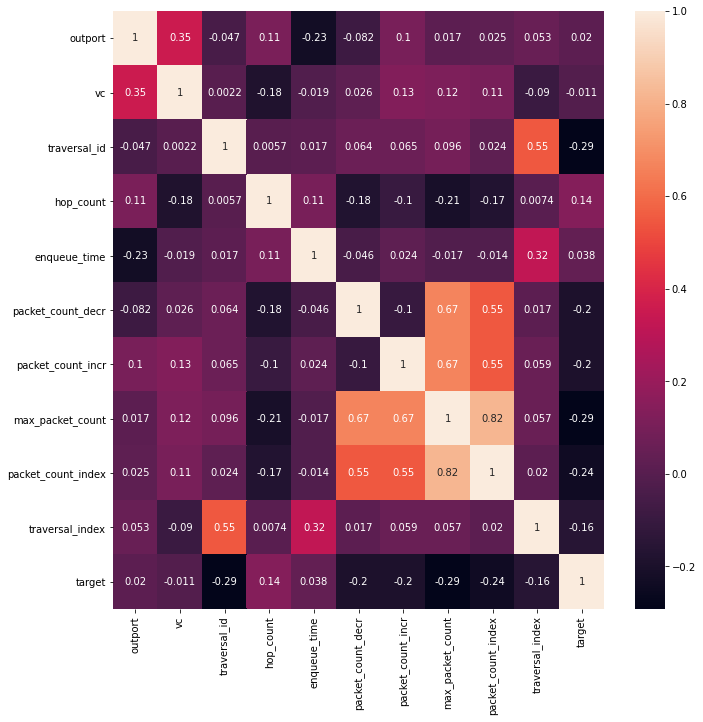

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

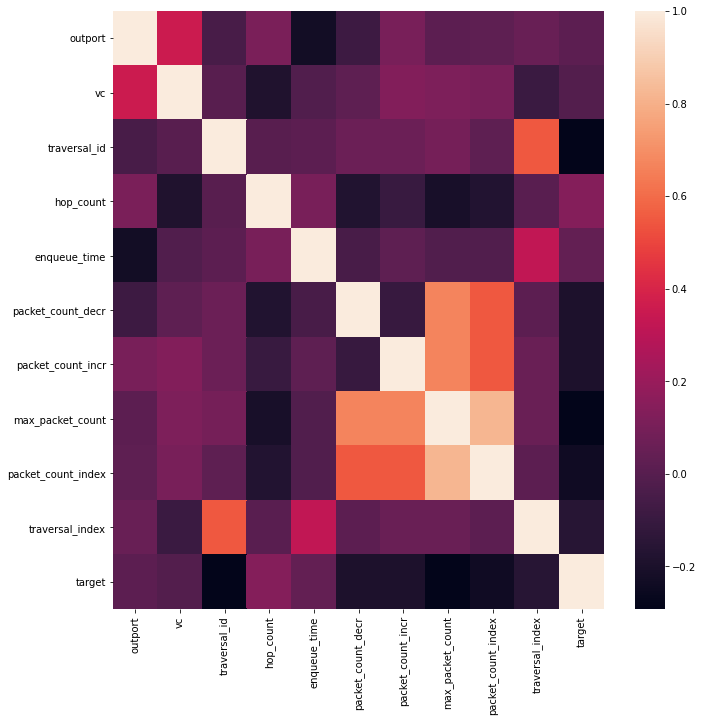

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000033,0.4,0.066667,0.079710,0.000000,0.079710,0.002245,0.000001
1,0.50,0.000000,0.000000,0.6,0.133333,0.036232,0.000000,0.036232,0.001021,0.000000
2,0.50,0.333333,0.000000,0.6,0.133333,0.072464,0.007246,0.079710,0.004287,0.000000
3,0.25,0.000000,0.000233,0.2,0.066667,0.065217,0.014493,0.079710,0.005920,0.000010
4,0.25,0.000000,0.000166,0.4,0.133333,0.028986,0.007246,0.036232,0.001837,0.000007
...,...,...,...,...,...,...,...,...,...,...
84645,1.00,0.333333,0.999967,0.4,0.350000,0.028986,0.072464,0.101449,0.011023,0.533333
84646,1.00,0.333333,0.999967,0.4,0.466667,0.021739,0.079710,0.101449,0.009594,1.000000
84647,1.00,0.666667,1.000000,0.4,0.466667,0.014493,0.086957,0.101449,0.007757,0.088890
84648,0.50,1.000000,0.999967,0.6,0.033333,0.007246,0.094203,0.101449,0.005511,0.311110


In [0]:
train_X[train_X.duplicated()].shape

(0, 10)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.50,0.133333,0.054348,0.000000,0.054348,0.002264,0.000000
1,0.25,0.000000,0.000266,0.25,0.133333,0.043478,0.010870,0.054348,0.004076,0.000012
2,0.50,0.000000,0.000366,0.50,0.133333,0.032609,0.021739,0.054348,0.004982,0.000016
3,0.50,0.000000,0.000698,0.50,0.133333,0.021739,0.032609,0.054348,0.004982,0.000031
4,0.25,0.000000,0.000864,0.75,0.133333,0.010870,0.043478,0.054348,0.004076,0.000038
...,...,...,...,...,...,...,...,...,...,...
39846,1.00,0.333333,0.999967,0.25,0.350000,0.043478,0.054348,0.097826,0.013134,0.533333
39847,1.00,0.333333,0.999967,0.25,0.466667,0.032609,0.065217,0.097826,0.012228,1.000000
39848,1.00,0.666667,1.000000,0.25,0.466667,0.021739,0.076087,0.097826,0.010417,0.088890
39849,0.50,1.000000,0.999967,0.50,0.033333,0.010870,0.086957,0.097826,0.007699,0.311110


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    53621
1    31029
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  841.661845
7    max_packet_count  495.652189
8  packet_count_index  399.329559
9     traversal_index  279.455681
5   packet_count_decr  251.956843
6   packet_count_incr  243.729160
3           hop_count  101.496449
0             outport    8.599790
4        enqueue_time    6.803017
1                  vc    2.403771


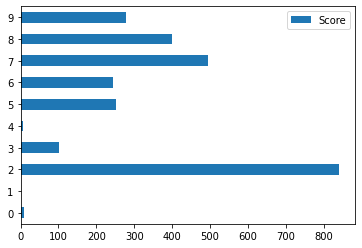

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.21943048576215
Test Prediction Score 94.80221943798102


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.60008531780883
Test Prediction Score 83.37679269882659
Test Prediction Score 86.9965621941733


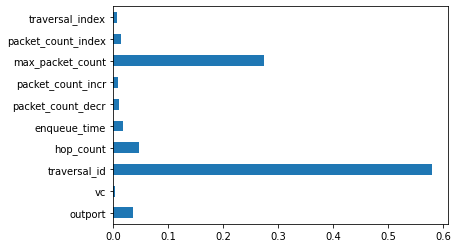

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

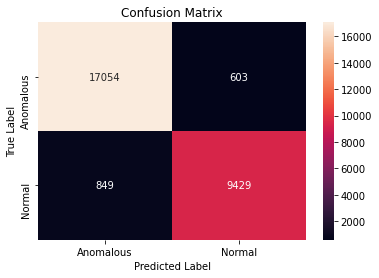

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17657
           1       0.94      0.92      0.93     10278

    accuracy                           0.95     27935
   macro avg       0.95      0.94      0.94     27935
weighted avg       0.95      0.95      0.95     27935



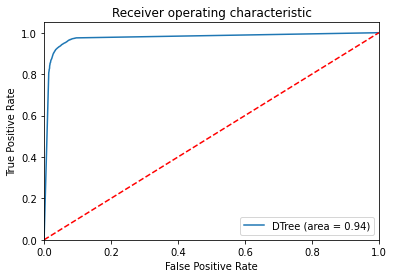

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r2l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.25899409343117


In [0]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(xgbc, X_test, y_test, cv=kfold)
print (results*100)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[96.20615605 95.16821761 95.49033644 95.70508232 95.70508232 96.34801289
 96.02577873 96.13319012 96.09738632 95.88256355]
Accuracy: 95.88% (0.34%)


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.91498331284033
Test Prediction Score 83.51970715073713
Test Prediction Score 88.30644149456727


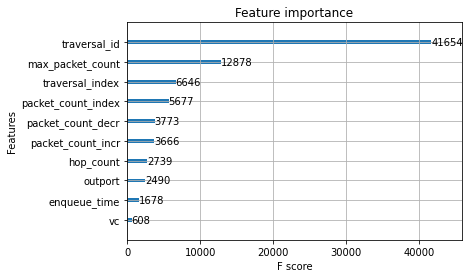

In [0]:
plot_importance(xgbc)
plt.show()

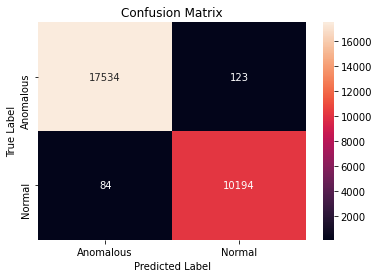

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17657
           1       0.99      0.99      0.99     10278

    accuracy                           0.99     27935
   macro avg       0.99      0.99      0.99     27935
weighted avg       0.99      0.99      0.99     27935



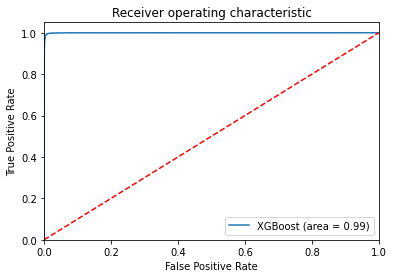

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()